<a href="https://colab.research.google.com/github/pranabeshdash/ERAV2/blob/main/Session_5_Intro_PyTorch/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone git@github.com:pranabeshdash/ERAV2.git
!pip install torchsummary

CODE BLOCK: 1

In [ ]:
from ERAV2.Session5_Intro_PyTorch import *

CODE BLOCK: 2

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


CODE BLOCK: 3

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35476608.23it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1123947.54it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10234984.18it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8004423.85it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [ ]:
# set seed
torch.manual_seed(1)

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = get_loader(test_data, **kwargs)
train_loader = get_loader(train_data, **kwargs)

CODE BLOCK: 6

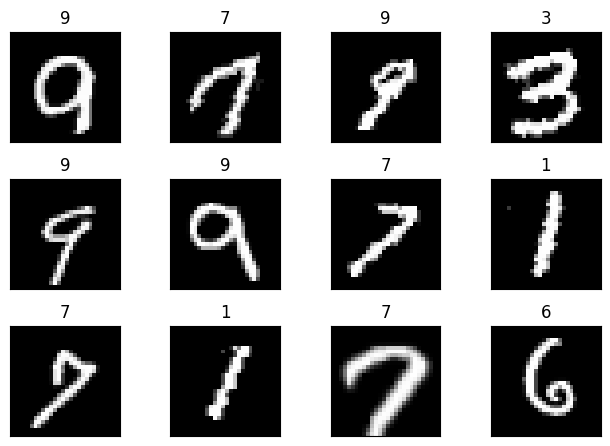

In [ ]:
view_data(loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.9470 Batch_id=117 Accuracy=36.84: 100%|██████████| 118/118 [00:30<00:00,  3.90it/s]


Test set: Average loss: 0.7101, Accuracy: 7573/10000 (75.73%)

Epoch 2


Train: Loss=0.0876 Batch_id=117 Accuracy=90.00: 100%|██████████| 118/118 [00:23<00:00,  4.98it/s]


Test set: Average loss: 0.1259, Accuracy: 9600/10000 (96.00%)

Epoch 3


Train: Loss=0.1558 Batch_id=117 Accuracy=95.52: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0675, Accuracy: 9799/10000 (97.99%)

Epoch 4


Train: Loss=0.0996 Batch_id=117 Accuracy=96.74: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0516, Accuracy: 9829/10000 (98.29%)

Epoch 5


Train: Loss=0.0576 Batch_id=117 Accuracy=97.29: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]


Test set: Average loss: 0.0450, Accuracy: 9845/10000 (98.45%)

Epoch 6


Train: Loss=0.0459 Batch_id=117 Accuracy=97.78: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.0366, Accuracy: 9876/10000 (98.76%)

Epoch 7


Train: Loss=0.0786 Batch_id=117 Accuracy=97.93: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0374, Accuracy: 9884/10000 (98.84%)

Epoch 8


Train: Loss=0.1059 Batch_id=117 Accuracy=98.15: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 0.0354, Accuracy: 9884/10000 (98.84%)

Epoch 9


Train: Loss=0.0781 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: 0.0311, Accuracy: 9903/10000 (99.03%)

Epoch 10


Train: Loss=0.0418 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0325, Accuracy: 9899/10000 (98.99%)

Epoch 11


Train: Loss=0.0609 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0266, Accuracy: 9916/10000 (99.16%)

Epoch 12


Train: Loss=0.0854 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 0.0262, Accuracy: 9911/10000 (99.11%)

Epoch 13


Train: Loss=0.0087 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0246, Accuracy: 9919/10000 (99.19%)

Epoch 14


Train: Loss=0.0835 Batch_id=117 Accuracy=98.74: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0236, Accuracy: 9915/10000 (99.15%)

Epoch 15


Train: Loss=0.0516 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:22<00:00,  5.13it/s]


Test set: Average loss: 0.0245, Accuracy: 9917/10000 (99.17%)

Epoch 16


Train: Loss=0.0458 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Epoch 17


Train: Loss=0.0271 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

Epoch 18


Train: Loss=0.0305 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0202, Accuracy: 9933/10000 (99.33%)

Epoch 19


Train: Loss=0.0328 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:24<00:00,  4.90it/s]


Test set: Average loss: 0.0204, Accuracy: 9931/10000 (99.31%)

Epoch 20


Train: Loss=0.0492 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.0199, Accuracy: 9931/10000 (99.31%)



CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

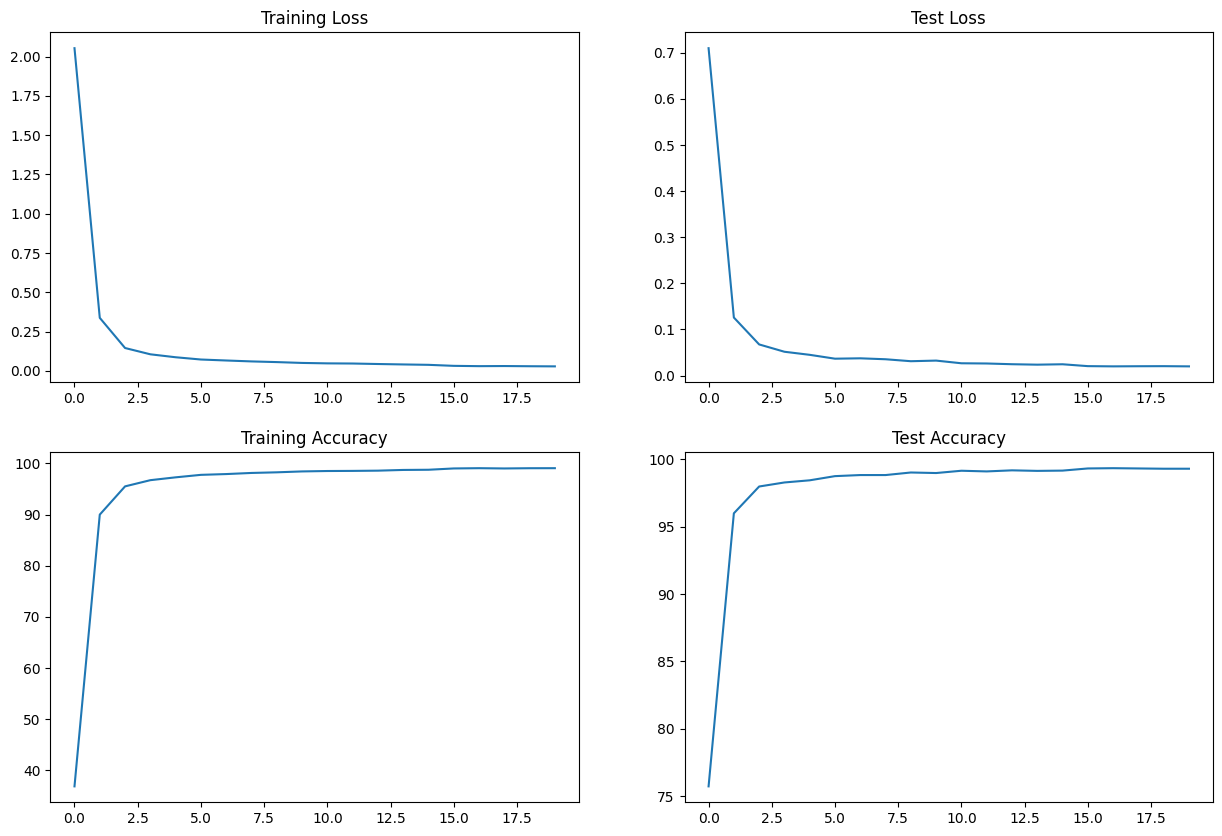

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")